# CO2 Concentrations Forecast

A simple example to show Time Series forecasting using ARIMA

Source:<br>
https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

CO2 concentrations (NOAA, 2018)
Variable description	Average concentration of carbon dioxide (CO₂) in the atmosphere, measured in parts per million (ppm).
Variable geographic coverage	global
Variable time span	803719 BCE – 2018
Data published by	NOAA/ESRL
Data publisher's source	Bernhard Bereiter, Sarah Eggleston, Jochen Schmitt, Christoph Nehrbass-Ahles, Thomas F. Stocker, Hubertus Fischer, Sepp Kipfstuhl and Jerome Chappellaz. 2015. Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present. Geophysical Research Letters. . doi: 10.1002/2014GL061957
Link	https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Annual mean CO₂ concentrations in the atmosphere, measured in parts per million (ppm).

Long-term global average atmospheric concentrations of CO₂ have been combined using several sources, all available at the NOAA/ESRL Global Monitoring Division.

Very long-term data from ice cores – specifically the Dome C core – has been made available from the NOAA here: https://www.ncdc.noaa.gov/paleo-search/study/17975. In this original dataset, some years had multiple measurements (taken at different points of the year). To normalize this to a single year, where several measurements were available, we took the average of these concentration values.
The original source of this research is:
Bernhard Bereiter, Sarah Eggleston, Jochen Schmitt, Christoph Nehrbass-Ahles, Thomas F. Stocker, Hubertus Fischer, Sepp Kipfstuhl and Jerome Chappellaz. 2015. Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present. Geophysical Research Letters. . doi: 10.1002/2014GL061957.

Dome C data has been used until the year 1958.

Data from 1959 through 1979 have been obtained by C. David Keeling of the Scripps Institution of Oceanography (SIO) and were obtained from the Scripps website (scrippsco2.ucsd.edu).

Data from 1980 onwards is sourced from NOAA's Mauna Loa monitoring station, available at: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Import Libraries

In [1]:
import datetime as dt
now1 = dt.datetime.now()

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
plt.style.use("fivethirtyeight")

C:\ProgramData\Anaconda3\envs\tf-gpu+base_test\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\envs\tf-gpu+base_test\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Read Data (from csv file)

In [2]:
headers = [pd.read_csv('co2-concentration.csv', nrows=1)]
headers

[  Entity      Code    Year  CO₂ concentration (parts per million)
 0  World  OWID_WRL -803719                                 207.29]

In [3]:
df_co2 = pd.read_csv('co2-concentration.csv', usecols=['Year','CO₂ concentration (parts per million)'])
df_co2.columns = ['year', 'value']
df_co2.set_index('year',inplace=True)
n=70
df= df_co2.tail(n)

Buid ARIMA model

In [4]:
model = pm.auto_arima(df.value, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 1, 0); AIC=180.889, BIC=185.357, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=176.696, BIC=183.399, Fit time=0.012 seconds
Fit ARIMA: order=(0, 1, 1); AIC=178.573, BIC=185.276, Fit time=0.011 seconds
Fit ARIMA: order=(2, 1, 0); AIC=172.162, BIC=181.099, Fit time=0.021 seconds
Fit ARIMA: order=(2, 1, 1); AIC=157.794, BIC=168.965, Fit time=0.076 seconds
Fit ARIMA: order=(1, 1, 1); AIC=184.867, BIC=193.804, Fit time=0.086 seconds
Fit ARIMA: order=(2, 1, 2); AIC=163.270, BIC=176.675, Fit time=0.484 seconds
Total fit time: 0.702 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   69
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -73.897
Method:                       css-mle   S.D. of innovations              0.697
Date:                Tue, 17 Dec 2019   AIC                            157.794
Time:                        22:26:4

Model PLots

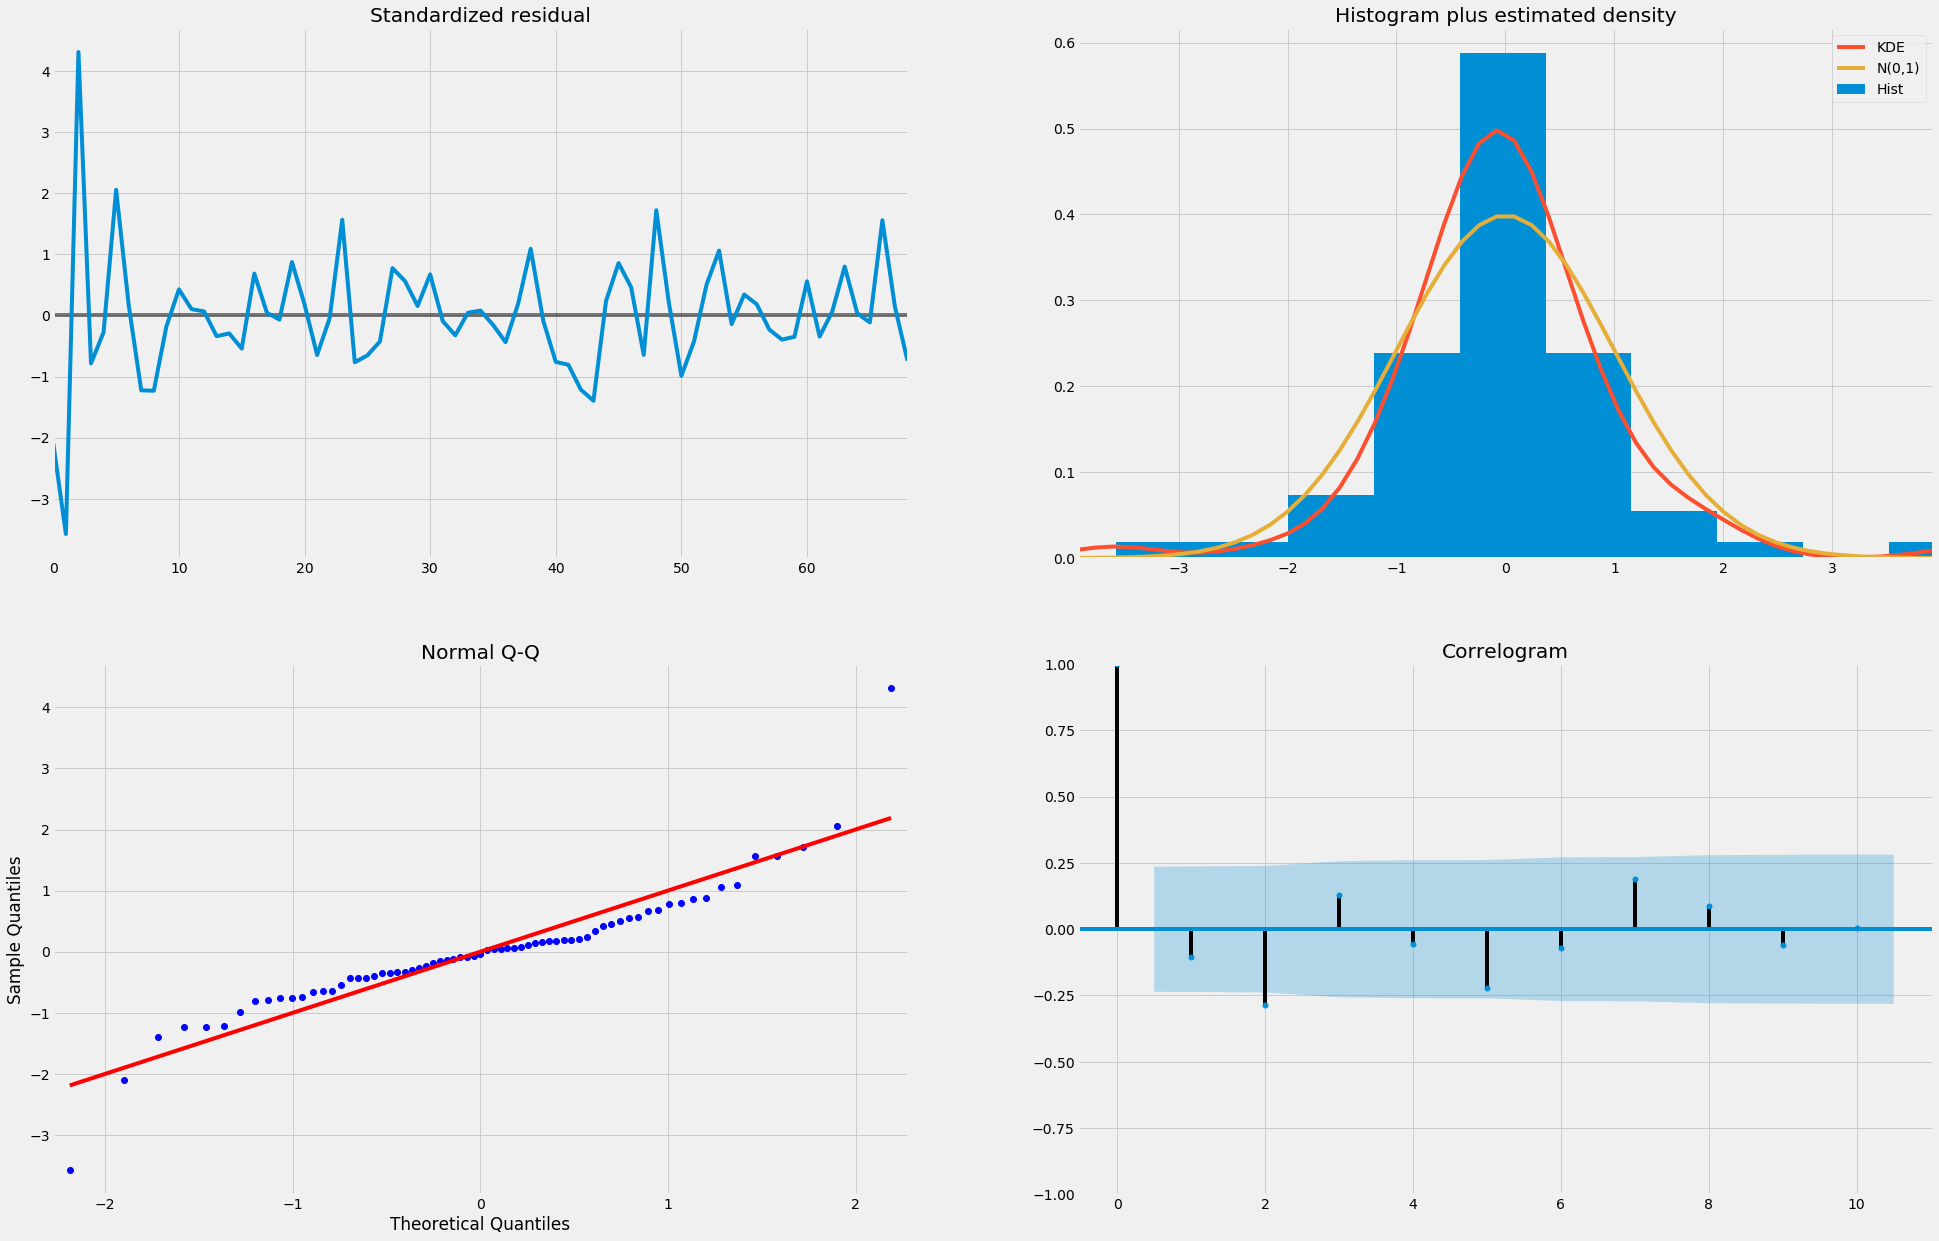

In [5]:
model.plot_diagnostics(figsize=(30,20))
plt.show()


Forecast

In [6]:
# Forecast
n_periods = 25
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(max(df.index)+1,max(df.index)+n_periods+1)



Plot Forecasts

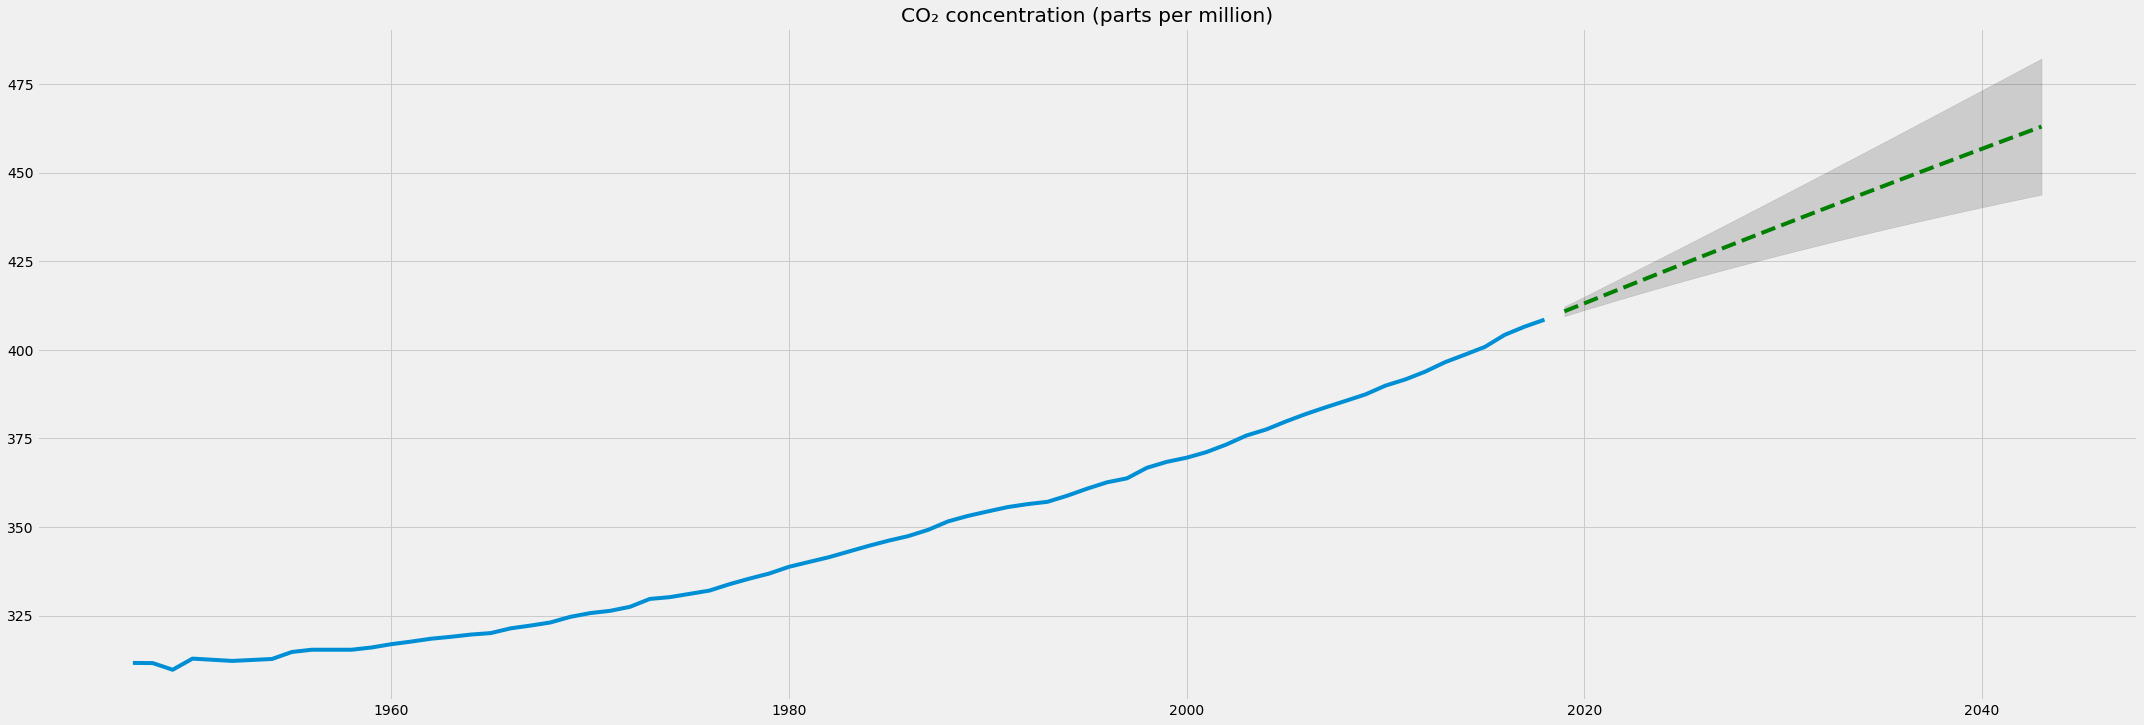

*********************************************************
*********************************************************
Processing Time:                       0:01:08.301408


In [8]:

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
rcParams['figure.figsize'] = 30,10
plt.plot(df.value)
plt.plot(fc_series, color='green', linestyle='dashed')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
# plt.legend()
plt.tight_layout()
plt.title("CO₂ concentration (parts per million)")

plt.show()

print("*********************************************************")
now2 = dt.datetime.now()

print("*********************************************************")
print("Processing Time:                      ",(now2-now1))